In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from ANEMO import read_edf
import numpy as np
from lmfit import  Model, Parameters
%matplotlib inline

In [2]:
!ls ../data/

bet_s01_2017-09-29_123528.pkl	  eyeMvt_s05_2017-10-03_143803.EDF
bet_s02_2017-09-25_142503.pkl	  eyeMvt_s05_2017-10-03_143803.pkl
bet_s03_2017-09-28_154353.pkl	  eyeMvt_s06_2017-09-28_115250.asc
bet_s04_2017-09-26_162348.pkl	  eyeMvt_s06_2017-09-28_115250.edf
bet_s05_2017-09-26_143606.pkl	  eyeMvt_s06_2017-09-28_115250.pkl
bet_s06_2017-09-26_122431.pkl	  eyeMvt_s07_2017-09-20_151043.asc
bet_s07_2017-09-19_152205.pkl	  eyeMvt_s07_2017-09-20_151043.edf
bet_s08_2017-10-24_105728.pkl	  eyeMvt_s07_2017-09-20_151043.pkl
bet_s09_2017-11-07_105527.pkl	  eyeMvt_s08_2017-10-26_121823.asc
bet_s10_2017-11-14_102614.pkl	  eyeMvt_s08_2017-10-26_121823.edf
bet_s11_2017-11-08_155132.pkl	  eyeMvt_s08_2017-10-26_121823.pkl
bet_s12_2017-11-06_164857.pkl	  eyeMvt_s09_2017-11-08_094717.asc
eyeMvt_s01_2017-10-23_100057.asc  eyeMvt_s09_2017-11-08_094717.edf
eyeMvt_s01_2017-10-23_100057.edf  eyeMvt_s09_2017-11-08_094717.pkl
eyeMvt_s01_2017-10-23_100057.pkl  eyeMvt_s10_2017-11-16_153313.asc
eyeMvt_s02_2017-09-

In [3]:
timeStr = '2017-11-17_172706'
observer = 's12'
mode = 'eyeMvt'

In [4]:
file = os.path.join('..','data', mode + '_' + observer + '_' + timeStr + '.pkl')
with open(file, 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')
      
resultats = os.path.join('..','data', mode + '_' + observer + '_' + timeStr + '.asc')
data = read_edf(resultats, 'TRIALID')

In [5]:
N_trials = exp['N_trials']
N_blocks = exp['N_blocks']
screen_width_px = exp['screen_width_px']
screen_height_px = exp['screen_height_px']
V_X = exp['V_X']
RashBass = exp['RashBass']
stim_tau = exp['stim_tau']
p = exp['p']

In [6]:
def exponentiel (x, tau, maxi, start_anti, a_anti, latency, bino) :
    '''
    tau -- courbe
    maxi -- maximum
    latency -- tps où commence le mvt
    bino -- binomial
    
    start_anti = debut de l'anticipation
    a_anti =  vitesse de l'anticipation
    ''' 
    a_anti = a_anti/1000 # pour passer de sec à ms
    time = np.arange(len(x))
    vitesse = []
                
    for t in range(len(time)):
        
        if start_anti >= latency :
            if time[t] < latency :
                vitesse.append(0)
            else :
                vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latency))))
        else :

            if time[t] < start_anti :
                vitesse.append(0)
            else :
                if time[t] < latency :
                    #vitesse.append((bino*2-1)*(time[t]-start_anti)*a_anti)
                    vitesse.append((time[t]-start_anti)*a_anti)
                    x = (time[t]-start_anti)*a_anti
                else :
                    vitesse.append((bino*2-1)*maxi*(1-np.exp(-1/tau*(time[t]-latency)))+x)
    return vitesse

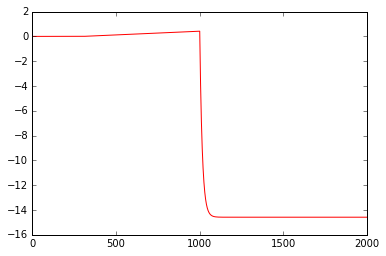

In [7]:
plt.plot(exponentiel(np.arange(2000), tau=15, maxi=15., start_anti=300, latency=1000., a_anti=0.6, bino=0), c='r')

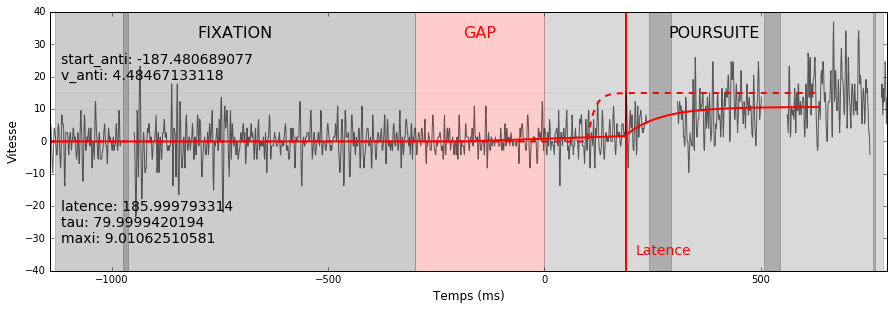

[[Model]]
    Model(exponentiel)
[[Fit Statistics]]
    # function evals   = 327
    # data points      = 1650
    # variables        = 5
    chi-square         = 42921.167
    reduced chi-square = 26.092
    Akaike info crit   = 5386.673
    Bayesian info crit = 5413.716
[[Variables]]
    tau:          79.9999420 +/- 30.59297 (38.24%) (init= 15)
    maxi:         9.01062510 +/- 0.751342 (8.34%) (init= 15)
    latency:      1360.99979 +/- 11.85513 (0.87%) (init= 1275)
    start_anti:   987.519310 +/- 118.0989 (11.96%) (init= 1075)
    a_anti:       4.48467133 +/- 2.456276 (54.77%) (init= 0)
    bino:         1 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(start_anti, a_anti)        =  0.866 
    C(maxi, a_anti)              = -0.608 
    C(tau, latency)              =  0.583 
    C(tau, maxi)                 = -0.547 
    C(maxi, latency)             = -0.509 
    C(maxi, start_anti)          = -0.351 
    C(latency, a_anti)           =  0.342 
    C(latency, st

In [8]:
fig_width= 15
fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/2)/1.6180))
block = 0
trial = 4

trial_data = trial + N_trials*block

data_x = data[trial_data]['x']
data_y = data[trial_data]['y']
trackertime = data[trial_data]['trackertime']

StimulusOn = data[trial_data]['events']['msg'][10][0]
StimulusOf = data[trial_data]['events']['msg'][14][0]
TargetOn = data[trial_data]['events']['msg'][15][0]
TargetOff = data[trial_data]['events']['msg'][16][0]
saccades = data[trial_data]['events']['Esac']
trackertime_0 = data[trial_data]['trackertime'][0]

gradient_x = np.gradient(data_x) # gradient en px/ms
gradient_deg = gradient_x * 1/exp['px_per_deg'] * 1000 # gradient en deg/sec

##################################################
# SUPPRESSION DES SACCADES
##################################################
gradient_deg_NAN = gradient_deg

for s in range(len(saccades)) :
    if saccades[s][1]-trackertime_0+15 <= (len(trackertime)) :
        for x_data in np.arange((saccades[s][0]-trackertime_0-5), (saccades[s][1]-trackertime_0+15)) :
            gradient_deg_NAN[x_data] = np.nan
    else :
        for x_data in np.arange((saccades[s][0]-trackertime_0-5), (len(trackertime))) :
            gradient_deg_NAN[x_data] = np.nan

stop_latency = []    
for s in range(len(saccades)) :
    if (saccades[s][0]-trackertime_0) >= (TargetOn-trackertime_0+100) :
        stop_latency.append((saccades[s][0]-trackertime_0))
if stop_latency==[] :
    stop_latency.append(len(trackertime))
##################################################

start = TargetOn

StimulusOn_s = StimulusOn - start
StimulusOf_s = StimulusOf - start
TargetOn_s = TargetOn - start
TargetOff_s = TargetOff - start
trackertime_s = trackertime - start

# FIT
model = Model(exponentiel)
bino=p[trial, block, 0]
params = Parameters()

params.add('tau', value=15., min=13., max=80.)#, vary=False)
params.add('maxi', value=15., min=1., max=40.)#, vary=False)
params.add('latency', value=TargetOn-trackertime_0+100, min=TargetOn-trackertime_0+50, max=stop_latency[0])
params.add('start_anti', value=TargetOn-trackertime_0-100, min=StimulusOf-trackertime_0, max=TargetOn-trackertime_0-50)
params.add('a_anti', value=(bino*2-1)*0, min=-40., max=40.)
params.add('bino', value=bino, min=0, max=1, vary=False)

#result_deg = model.fit(new_gradient_deg, params, x=new_time)
result_deg = model.fit(gradient_deg_NAN[:-250], params, x=trackertime[:-250], fit_kws={'nan_policy': 'omit'})

debut  = TargetOn - trackertime_0 # TargetOn - temps_0

axs.axis([StimulusOn_s-10, TargetOff_s+10, -40, 40])

axs.plot(trackertime_s, gradient_deg_NAN, color='k', alpha=0.6)
axs.plot(trackertime_s[:-250], result_deg.init_fit, 'r--', linewidth=2)
axs.plot(trackertime_s[:-250], result_deg.best_fit, color='r', linewidth=2)
axs.plot(trackertime_s, np.ones(np.shape(trackertime_s)[0])*(bino*2-1)*15, color='k', linewidth=0.2, alpha=0.2)
axs.plot(trackertime_s, np.ones(np.shape(trackertime_s)[0])*(bino*2-1)*10, color='k', linewidth=0.2, alpha=0.2)


axs.axvspan(StimulusOn_s, StimulusOf_s, color='k', alpha=0.2)
axs.axvspan(StimulusOf_s, TargetOn_s, color='r', alpha=0.2)
axs.axvspan(TargetOn_s, TargetOff_s, color='k', alpha=0.15)
for s in range(len(saccades)) :
    axs.axvspan(saccades[s][0]-start, saccades[s][1]-start, color='k', alpha=0.2)

start_anti = result_deg.values['start_anti']-debut
a_anti = result_deg.values['a_anti']
latency = result_deg.values['latency']-debut
tau = result_deg.values['tau']
maxi = result_deg.values['maxi']

axs.bar(latency, 80, bottom=-40, color='r', width=6, linewidth=0)

axs.text(StimulusOn_s+(StimulusOf_s-StimulusOn_s)/2, 31, "FIXATION", color='k', fontsize=16, ha='center', va='bottom')
axs.text(StimulusOf_s+(TargetOn_s-StimulusOf_s)/2, 31, "GAP", color='r', fontsize=16, ha='center', va='bottom')
axs.text(TargetOn_s+(TargetOff_s-TargetOn_s)/2, 31, "POURSUITE", color='k', fontsize=16, ha='center', va='bottom')
axs.text(latency+25, -35, "latency", color='r', fontsize=14)#,  weight='bold')
axs.text(StimulusOn_s+15, 18, "start_anti: %s \na_anti: %s"%(start_anti, a_anti), color='k', fontsize=14, va='bottom')
axs.text(StimulusOn_s+15, -18, "latency: %s \ntau: %s \nmaxi: %s"%(latency, tau, maxi), color='k', fontsize=14, va='top')

axs.set_xlabel('Temps (ms)', fontsize=12)
axs.set_ylabel('Vitesse', fontsize=12)
plt.show()
print(result_deg.fit_report())